In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from KAGGLE_NLP_with_disaster_tweets.model.constants import parameters

os.environ["CUDA_VISIBLE_DEVICES"]="-1"

from KAGGLE_NLP_with_disaster_tweets.data_preparation.utils import DataPipeline

In [54]:
train_file_name = 'train.csv'
test_file_name = 'test.csv'
sample_submission_file_name = 'sample_submission.csv'

In [55]:
data_pipeline = DataPipeline(train_file_name, test_file_name, sample_submission_file_name, vocabulary_size=parameters["vocabulary_size"], output_sequence_length=140)
dataset, _ = data_pipeline.prepare_datasets()
dataframe = data_pipeline.dataframe

Getting the file: ../data/train.csv
-----------------------------------------------------------------------------------------
Dataset 
Size: 7613
Dataset examples:
Input: [   37   253  7835  5115  1666  4077 10987  1228    12   987    98    55
    29  1889     9   650    85  7868  9334   199   336  1435     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0  

<AxesSubplot:ylabel='Frequency'>

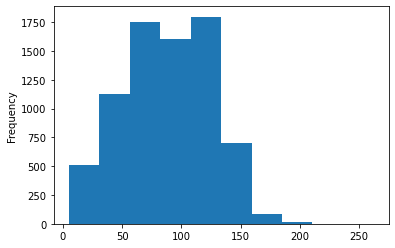

In [56]:
tweet_lengths = dataframe["text"].map(lambda tweet: len(tweet))
tweet_lengths.plot(kind='hist')

<AxesSubplot:>

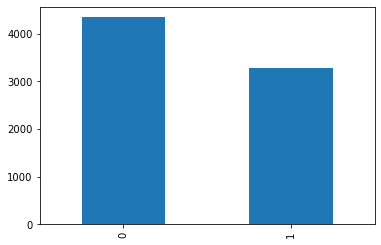

In [57]:
dataframe["target"].value_counts().plot(kind='bar')

### It can be easily seen that the classes are not distributed evenly.

In [58]:
dataframe[(dataframe['keyword'] == 'ablaze') & (dataframe['target'] == 1)]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,<USER> wholesale markets ablaze <URL>,1
33,50,ablaze,AFRICA,<HASHTAG> africanbaze <ALLCAPS> breaking news ...,1
37,55,ablaze,WorldWide!!,inec office in abia set ablaze <URL>,1
38,56,ablaze,,barbados <HASHTAG> bridgetown jamaica two cars...,1
46,66,ablaze,"GREENSBORO,NORTHCAROLINA",how the west was burne <SMILE> thousands of wi...,1
50,73,ablaze,"SheffieldTownship,Ohio",deputies man shot before brighton home set abl...,1
51,74,ablaze,India,man wife get six years jail for setting ablaze...,1
53,77,ablaze,Anaheim,police arsonist deliberately set black church ...,1
55,79,ablaze,USA,<HASHTAG> kurds trampling on turkmen flag late...,1
56,80,ablaze,SouthAfrica,truck ablaze r <NUMBER> voortrekker ave. outsi...,1


## Check the keyword frequency in the dataset

In [59]:
keywords = dataframe['keyword'].unique().tolist()
keyword_counts = {}
keywords_by_labels = []
for keyword in keywords:
    keyword_counts[keyword] = dataframe['keyword'].where(dataframe['keyword'] == keyword).count()
    keywords_by_labels.append({
        'keyword': keyword,
        'true': dataframe.where((dataframe['keyword'] == keyword) & (dataframe['target'] == 1))['id'].count(),
        'false': dataframe.where((dataframe['keyword'] == keyword) & (dataframe['target'] == 0))['id'].count()
    })
print(keyword_counts)

{'': 61, 'ablaze': 36, 'accident': 35, 'aftershock': 34, 'airplane accident': 35, 'ambulance': 38, 'annihilated': 34, 'annihilation': 29, 'apocalypse': 32, 'armageddon': 42, 'army': 34, 'arson': 32, 'arsonist': 34, 'attack': 36, 'attacked': 35, 'avalanche': 30, 'battle': 26, 'bioterror': 37, 'bioterrorism': 30, 'blaze': 38, 'blazing': 34, 'bleeding': 35, 'blew up': 33, 'blight': 32, 'blizzard': 37, 'blood': 35, 'bloody': 35, 'blown up': 33, 'body bag': 33, 'body bagging': 33, 'body bags': 41, 'bomb': 34, 'bombed': 38, 'bombing': 29, 'bridge collapse': 35, 'buildings burning': 35, 'buildings on fire': 33, 'burned': 33, 'burning': 34, 'burning buildings': 37, 'bush fires': 25, 'casualties': 35, 'casualty': 34, 'catastrophe': 36, 'catastrophic': 30, 'chemical emergency': 33, 'cliff fall': 36, 'collapse': 34, 'collapsed': 35, 'collide': 34, 'collided': 40, 'collision': 39, 'crash': 33, 'crashed': 34, 'crush': 37, 'crushed': 31, 'curfew': 37, 'cyclone': 32, 'damage': 41, 'danger': 36, 'dead

<AxesSubplot:>

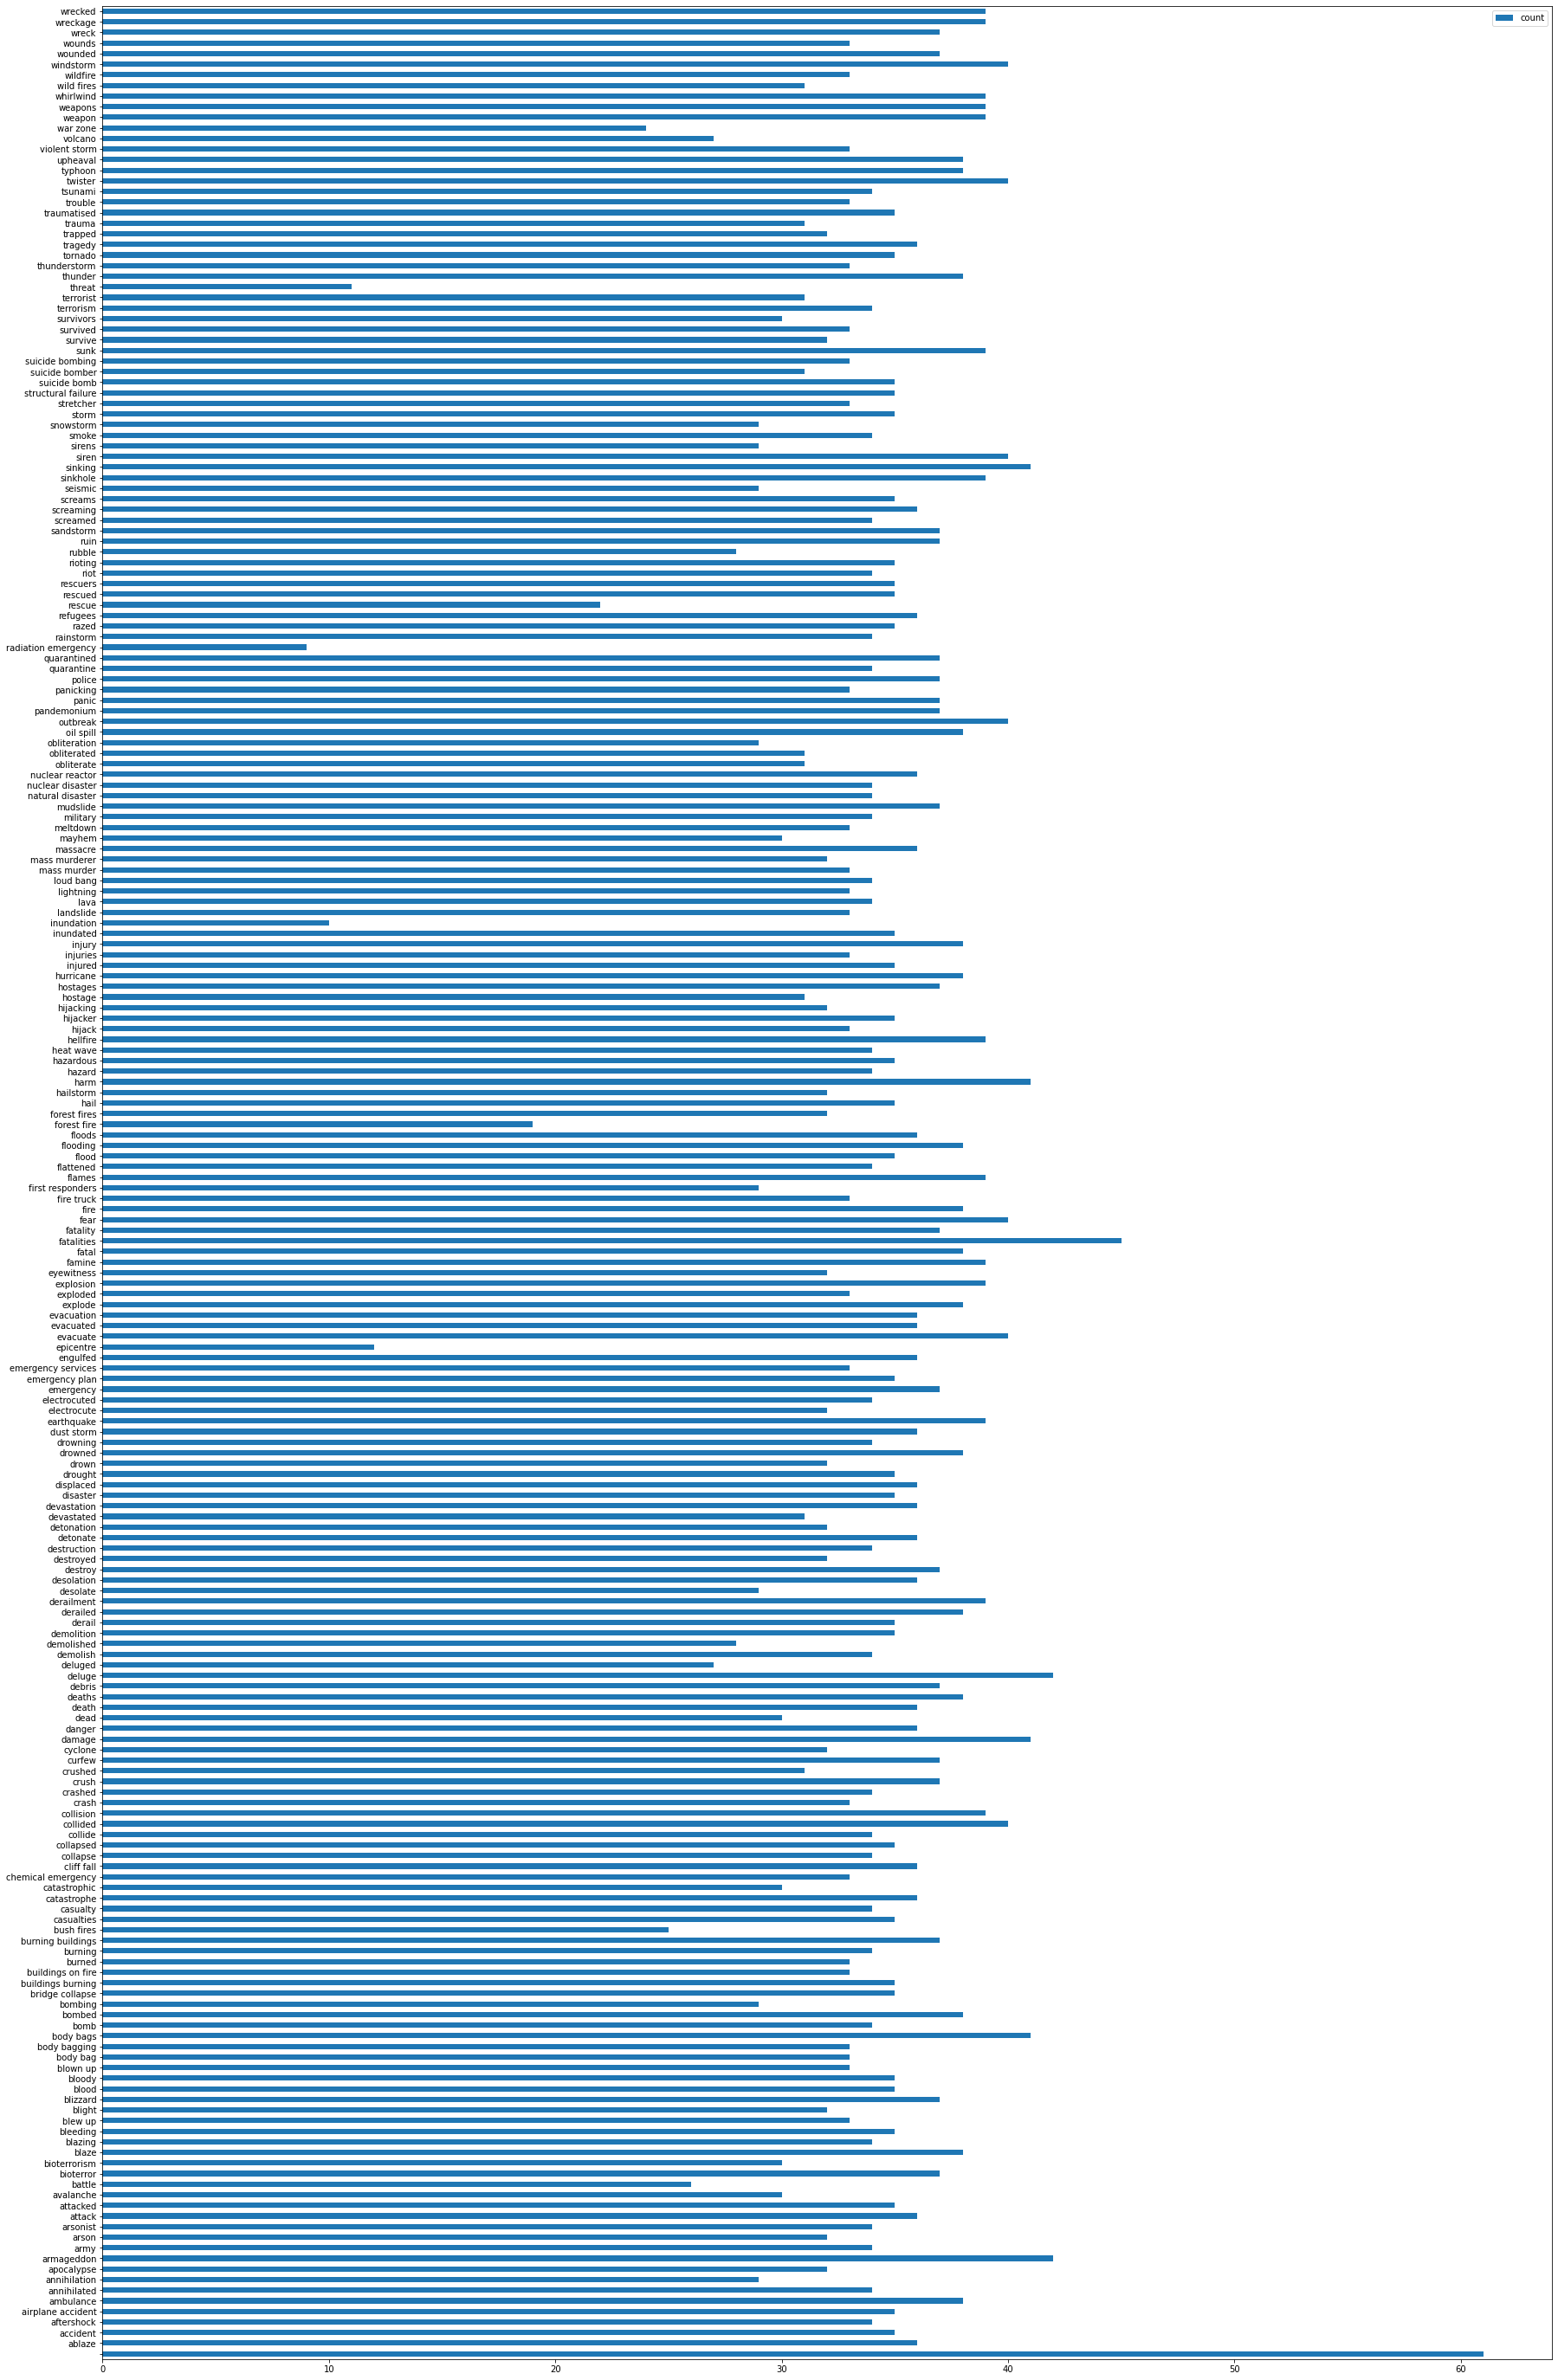

In [60]:
keyword_count_df = pd.DataFrame({"keyword": keyword_counts.keys(), "count": keyword_counts.values()}, index=keyword_counts.keys())
keyword_count_df.plot.barh(figsize=(30, 50))
# keyword_count_df

In [61]:
keywords_by_labels

[{'keyword': '', 'true': 42, 'false': 19},
 {'keyword': 'ablaze', 'true': 13, 'false': 23},
 {'keyword': 'accident', 'true': 24, 'false': 11},
 {'keyword': 'aftershock', 'true': 0, 'false': 34},
 {'keyword': 'airplane accident', 'true': 30, 'false': 5},
 {'keyword': 'ambulance', 'true': 20, 'false': 18},
 {'keyword': 'annihilated', 'true': 11, 'false': 23},
 {'keyword': 'annihilation', 'true': 10, 'false': 19},
 {'keyword': 'apocalypse', 'true': 9, 'false': 23},
 {'keyword': 'armageddon', 'true': 5, 'false': 37},
 {'keyword': 'army', 'true': 5, 'false': 29},
 {'keyword': 'arson', 'true': 22, 'false': 10},
 {'keyword': 'arsonist', 'true': 8, 'false': 26},
 {'keyword': 'attack', 'true': 25, 'false': 11},
 {'keyword': 'attacked', 'true': 21, 'false': 14},
 {'keyword': 'avalanche', 'true': 4, 'false': 26},
 {'keyword': 'battle', 'true': 5, 'false': 21},
 {'keyword': 'bioterror', 'true': 22, 'false': 15},
 {'keyword': 'bioterrorism', 'true': 21, 'false': 9},
 {'keyword': 'blaze', 'true': 5,

In [62]:
df = pd.DataFrame(keywords_by_labels)

In [63]:
df

,keyword,true,false
0,,42,19
1,ablaze,13,23
2,accident,24,11
3,aftershock,0,34
4,airplane accident,30,5
...,...,...,...
217,wounded,26,11
218,wounds,10,23
219,wreck,7,30
220,wreckage,39,0


## Check the keyword instances by their labels

In [64]:
import math

def visualize_keywords_by_labels(df: pd.DataFrame, num_figs: int):
    step_size = math.ceil(len(df) / num_figs)
    col_names = df.columns.names;
    fig, axs = plt.subplots(num_figs)

    # first slice the dataframe into num_figs parts
    for i in range(0, num_figs):
        sliced_df = df[i*step_size:(i+1)*step_size]
        indices = np.arange(len(sliced_df))
        width = 0.4

        axs[i].barh(indices, sliced_df.true, width, color='green', label='1')
        axs[i].barh(indices + width, sliced_df.false, width, color='red', label='0')

        axs[i].set(yticks=indices+width, yticklabels=sliced_df.keyword, ylim=[2*width - 1, len(sliced_df)])
        axs[i].legend()
        # axs[i]
    fig.set_size_inches(10, 20, forward=True)
    plt.show()

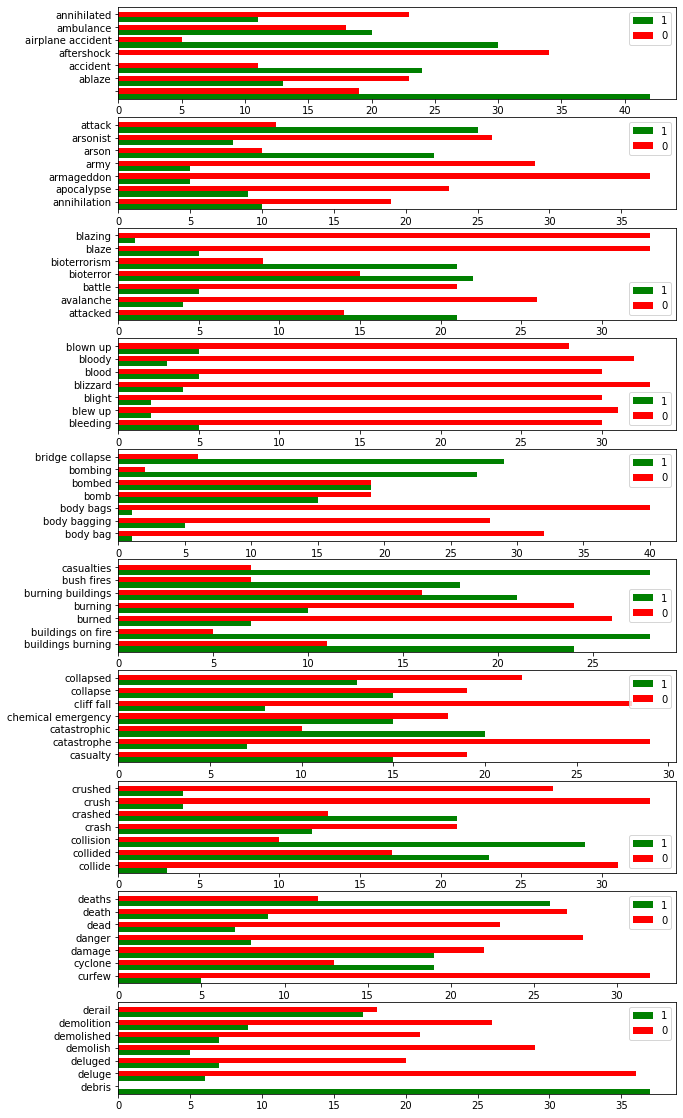

In [65]:
visualize_keywords_by_labels(df[0:70], 10)

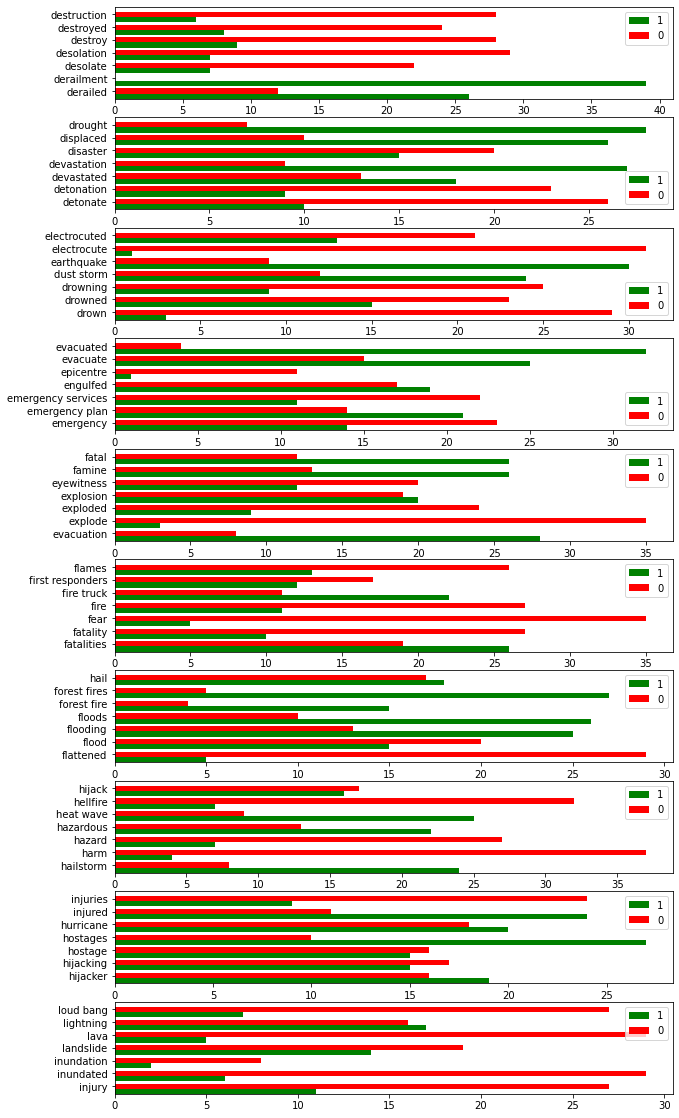

In [66]:
visualize_keywords_by_labels(df[70:140], 10)

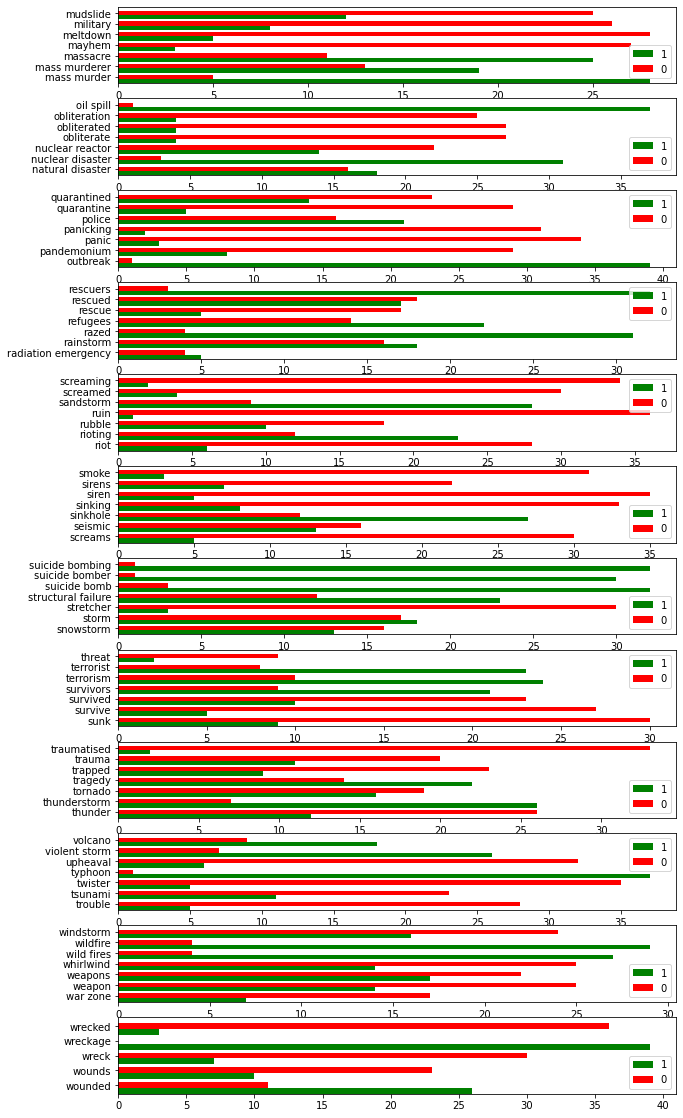

In [67]:
visualize_keywords_by_labels(df[140:], 12)

In [71]:
for element in dataset.take(10):
    print(element)

(<tf.Tensor: shape=(140,), dtype=int64, numpy=
array([   37,   253,  7835,  5115,  1666,  4077, 10987,  1228,    12,
         987,    98,    55,    29,  1889,     9,   650,    85,  7868,
        9334,   199,   336,  1435,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,  